In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ckdisease/kidney_disease.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/kaggle/input/ckdisease/kidney_disease.csv")
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
df.isna().sum()/len(df)*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [6]:
num=df.select_dtypes(exclude="object").columns
num

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo'],
      dtype='object')

In [7]:
cat=df.select_dtypes(include="object").columns
cat

Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [8]:
df["cad"].value_counts()

no      362
yes      34
\tno      2
Name: cad, dtype: int64

In [9]:
df["rbc"]=df["rbc"].fillna(df["rbc"].mode()[0])
df["pc"]=df["pc"].fillna(df["pc"].mode()[0])
df["pcc"]=df["pcc"].fillna(df["pcc"].mode()[0])
df["ba"]=df["ba"].fillna(df["ba"].mode()[0])
df["pcv"]=df["pcv"].fillna(df["pcv"].mode()[0])
df["wc"]=df["wc"].fillna(df["wc"].mode()[0])
df["rc"]=df["rc"].fillna(df["rc"].mode()[0])
df["htn"]=df["htn"].fillna(df["htn"].mode()[0])
df["appet"]=df["appet"].fillna(df["appet"].mode()[0])
df["pe"]=df["pe"].fillna(df["pe"].mode()[0])
df["ane"]=df["ane"].fillna(df["rbc"].mode()[0])
df["rbc"]=df["rbc"].fillna(df["rbc"].mode()[0])
df["dm"]=df["dm"].fillna(df["dm"].mode()[0])
df["cad"]=df["cad"].fillna(df["cad"].mode()[0])




In [10]:
df["age"]=df["age"].fillna(df["age"].mean())
df["bp"]=df["bp"].fillna(df["bp"].mean())

df["sg"]=df["sg"].fillna(df["sg"].mean())
df["al"]=df["al"].fillna(df["al"].mean())
df["su"]=df["su"].fillna(df["su"].mean())
df["bgr"]=df["bgr"].fillna(df["bgr"].mean())
df["bu"]=df["bu"].fillna(df["bu"].median())
df["sc"]=df["sc"].fillna(df["sc"].median())
df["sod"]=df["sod"].fillna(df["sod"].median())
df["pot"]=df["pot"].fillna(df["pot"].median())



df["hemo"]=df["hemo"].fillna(df["hemo"].mean())






In [11]:
df.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

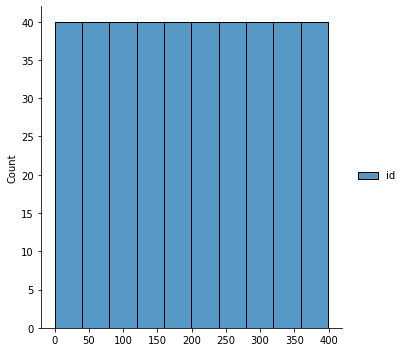

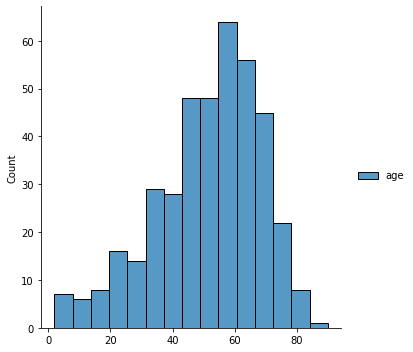

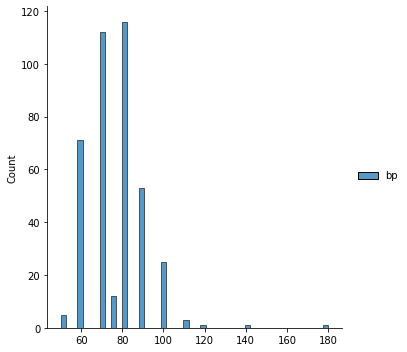

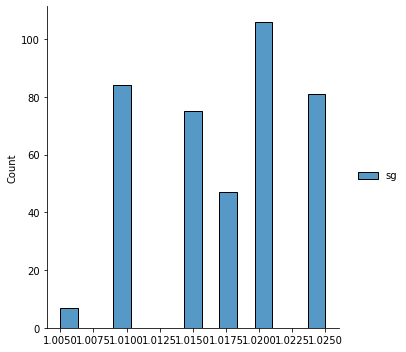

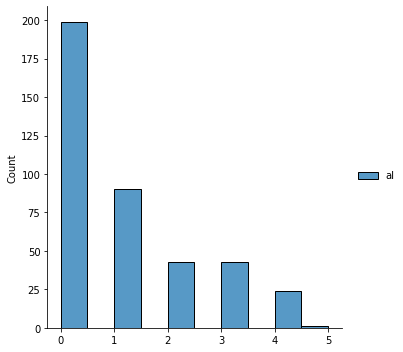

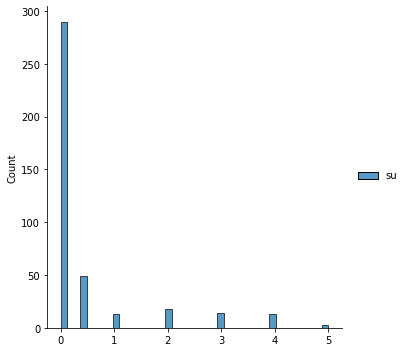

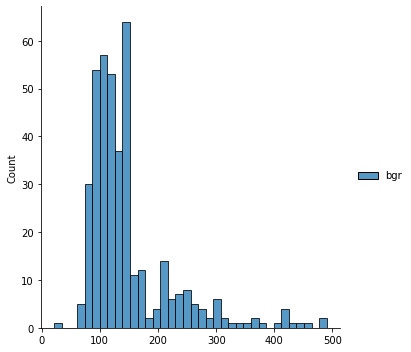

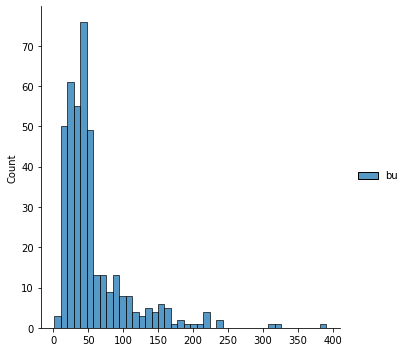

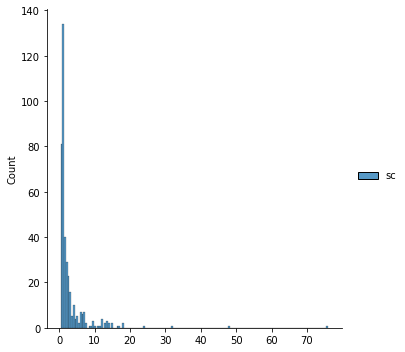

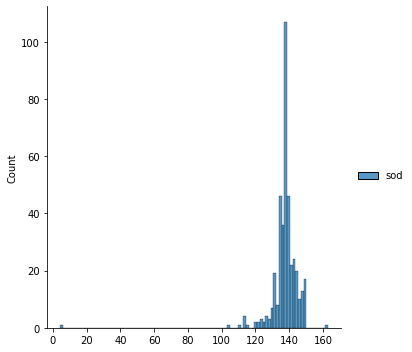

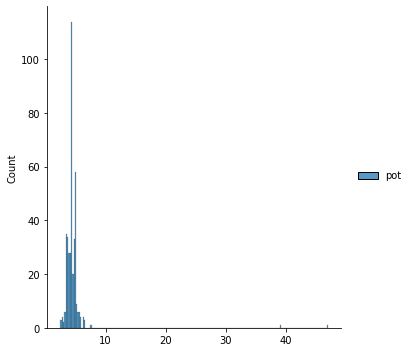

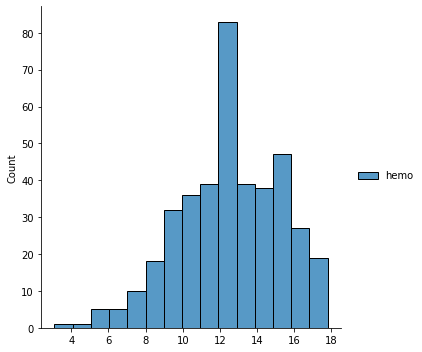

In [12]:
for x in num:
    sns.displot(df[[x]])

In [13]:
num= ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo']

In [14]:
df[num[0]].median()

54.0

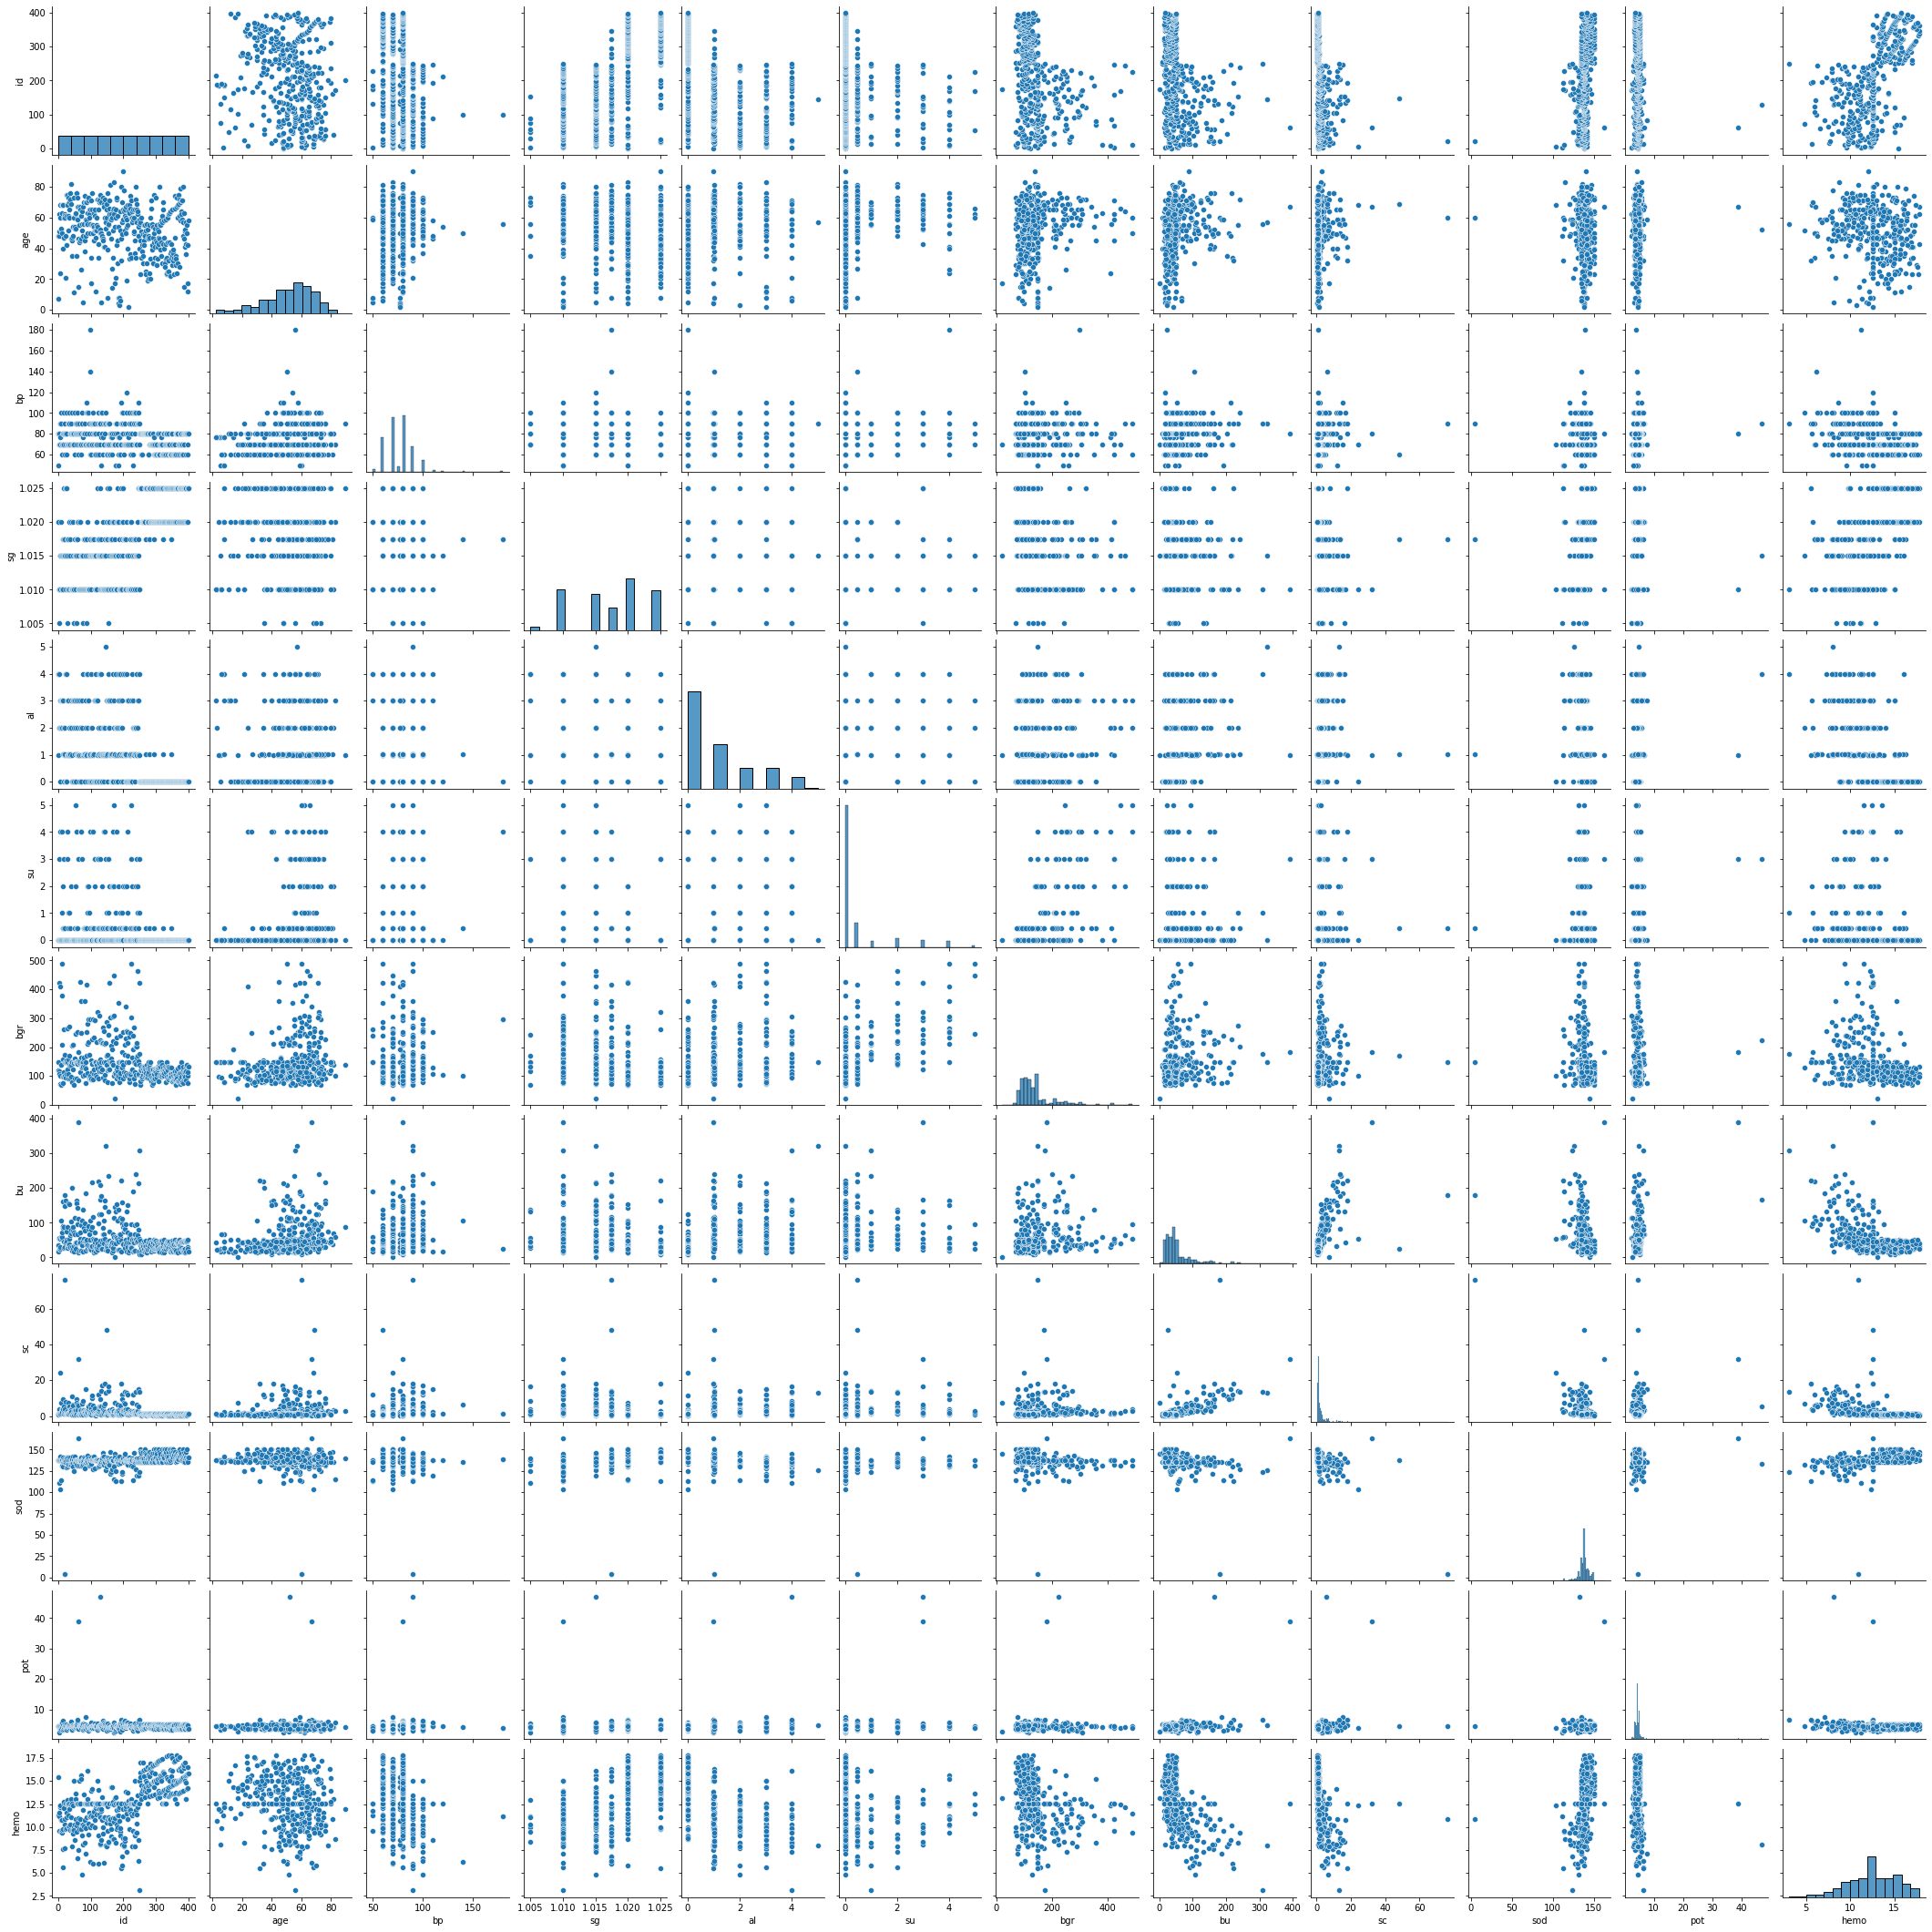

In [15]:
sns.pairplot(df)

In [16]:
cat

Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [17]:
# replace incorrect values

df['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['cad'] = df['cad'].replace(to_replace = '\tno', value='no')

df['classification'] = df['classification'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [18]:
df["classification"].value_counts()/len(df)*100

ckd        62.5
not ckd    37.5
Name: classification, dtype: float64

## make data set ready for modelling:

In [19]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [20]:
cat

Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat:
    df[col] = le.fit_transform(df[col])

In [22]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,32,72,34,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,26,56,34,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,19,70,34,0,1,0,1,0,2,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,20,62,19,1,0,0,1,1,2,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,23,68,27,0,0,0,0,0,0,0


In [23]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,32,72,34,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,26,56,34,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,19,70,34,0,1,0,1,0,2,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,20,62,19,1,0,0,1,1,2,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,23,68,27,0,0,0,0,0,0,0


In [24]:
df.drop("id",axis=1,inplace=True)

In [25]:
X=df.drop("classification",axis=1)
y=df["classification"]

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [28]:
from sklearn import metrics

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91        52
           1       0.77      0.96      0.86        28

    accuracy                           0.89        80
   macro avg       0.87      0.91      0.88        80
weighted avg       0.91      0.89      0.89        80



## let's do feature scaling:

In [30]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X_train,y_train)
mutual_info

array([0.0578833 , 0.08145797, 0.39292661, 0.32345588, 0.16152029,
       0.06723634, 0.09462856, 0.0658664 , 0.0389314 , 0.16249081,
       0.17446811, 0.36540648, 0.22746397, 0.18186585, 0.44189013,
       0.37216986, 0.11266719, 0.35282166, 0.20636673, 0.22890778,
       0.02496671, 0.10170685, 0.10762015, 0.06669845])

In [31]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

hemo     0.441890
sg       0.392927
pcv      0.372170
sc       0.365406
rc       0.352822
al       0.323456
dm       0.228908
sod      0.227464
htn      0.206367
pot      0.181866
bu       0.174468
bgr      0.162491
su       0.161520
wc       0.112667
pe       0.107620
appet    0.101707
pc       0.094629
bp       0.081458
rbc      0.067236
ane      0.066698
pcc      0.065866
age      0.057883
ba       0.038931
cad      0.024967
dtype: float64

In [32]:
from sklearn.feature_selection import SelectKBest
sel_5_cols=SelectKBest(mutual_info_classif,5)
sel_5_cols.fit(X_train,y_train)
X_train.columns[sel_5_cols.get_support()]

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass k=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Index(['sg', 'sc', 'hemo', 'pcv', 'rc'], dtype='object')

In [33]:
cols=['sg', 'sc', 'hemo', 'pcv', 'rc','classification']

In [34]:
df1=df[cols]
df1

,sg,sc,hemo,pcv,rc,classification
0,1.020,1.2,15.4,32,34,0
1,1.020,0.8,11.3,26,34,0
2,1.010,1.8,9.6,19,34,0
3,1.005,3.8,11.2,20,19,0
4,1.010,1.4,11.6,23,27,0
...,...,...,...,...,...,...
395,1.020,0.5,15.7,35,30,1
396,1.025,1.2,16.5,42,44,1
397,1.020,0.6,15.8,37,36,1
398,1.025,1.0,14.2,39,41,1


In [35]:
X=df.drop("classification",axis=1)
y=df["classification"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier(n_neighbors=4)
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        52
           1       0.84      0.93      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



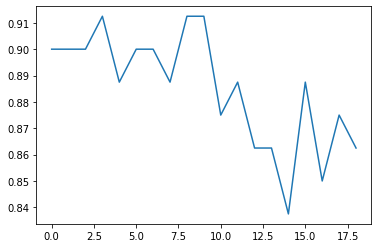

In [36]:
acc=[]
for x in range(1,20):
    model1=KNeighborsClassifier(n_neighbors=x)
    model1.fit(X_train,y_train)
    y_pred=model1.predict(X_test)
    acc.append(metrics.accuracy_score(y_test,y_pred))

plt.plot(acc)
    

In [37]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

